In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [2]:
# Load dataset
df = pd.read_csv("Housing.csv")

# Display basic info
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [3]:
# Convert categorical columns to numerical
categorical_cols = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']

# Apply Label Encoding
encoder = LabelEncoder()
for col in categorical_cols:
    df[col] = encoder.fit_transform(df[col])

df.head()


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0


In [4]:
print(df.isnull().sum())  # Should be all zeros if no missing values


price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


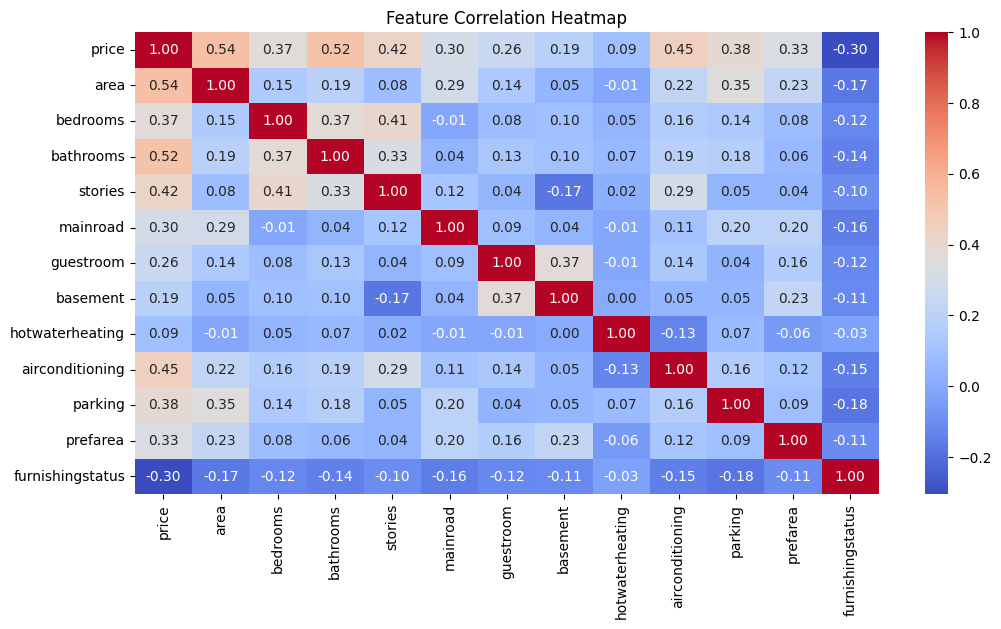

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [6]:
X = df.drop(columns=['price'])  # Features
y = df['price']  # Target variable


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [8]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)


In [9]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)


In [10]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    print(f"{model_name} Performance:")
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"RMSE: {rmse}")
    print(f"R² Score: {r2}")
    print("-" * 50)

# Evaluate Linear Regression
evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Evaluate Random Forest
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")


Linear Regression Performance:
MAE: 979679.6912959905
MSE: 1771751116594.0347
RMSE: 1331071.4167895105
R² Score: 0.6494754192267804
--------------------------------------------------
Random Forest Regressor Performance:
MAE: 1025289.6821100918
MSE: 1963538216518.6526
RMSE: 1401263.0789821919
R² Score: 0.6115321143409216
--------------------------------------------------


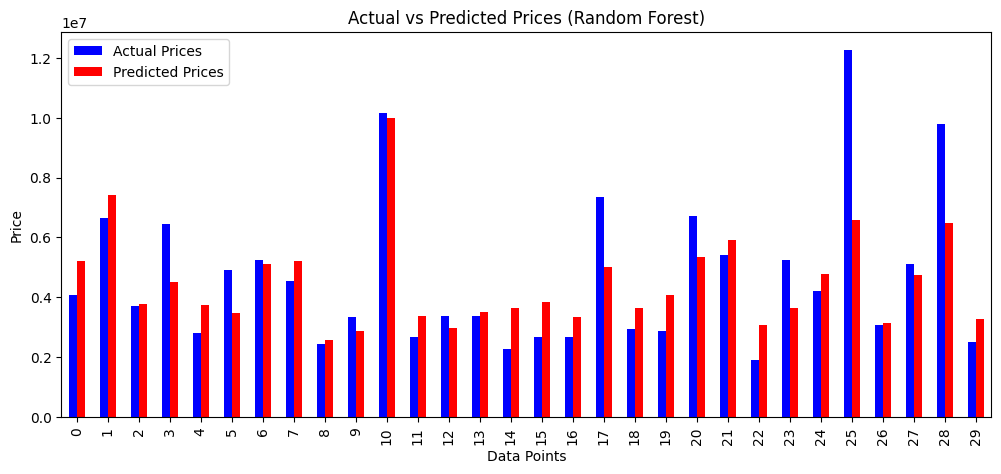

In [14]:
df_results = pd.DataFrame({"Actual": y_test.values, "Predicted": y_pred_rf})
df_results = df_results[:30]  # Display only 30 samples for better visualization

df_results.plot(kind="bar", figsize=(12, 5), color=["blue", "red"])
plt.xlabel("Data Points")
plt.ylabel("Price")
plt.title("Actual vs Predicted Prices (Random Forest)")
plt.legend(["Actual Prices", "Predicted Prices"])
plt.show()


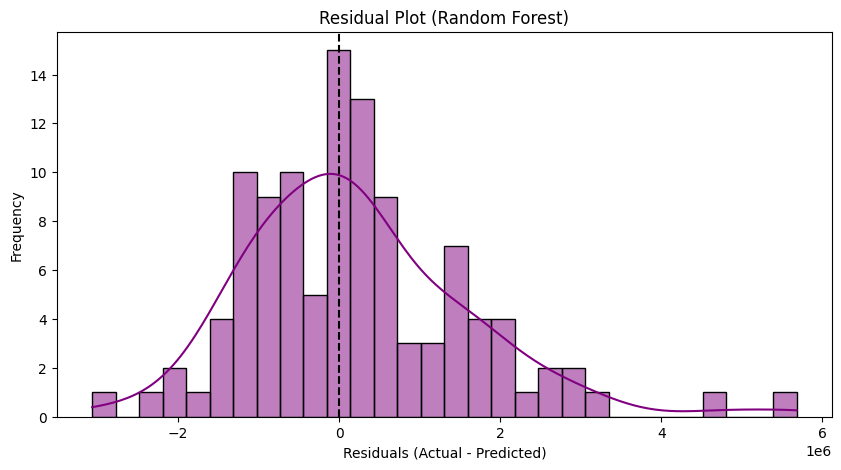

In [15]:
residuals = y_test - y_pred_rf

plt.figure(figsize=(10, 5))
sns.histplot(residuals, bins=30, kde=True, color="purple")
plt.axvline(x=0, color="black", linestyle="dashed")
plt.xlabel("Residuals (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Plot (Random Forest)")
plt.show()


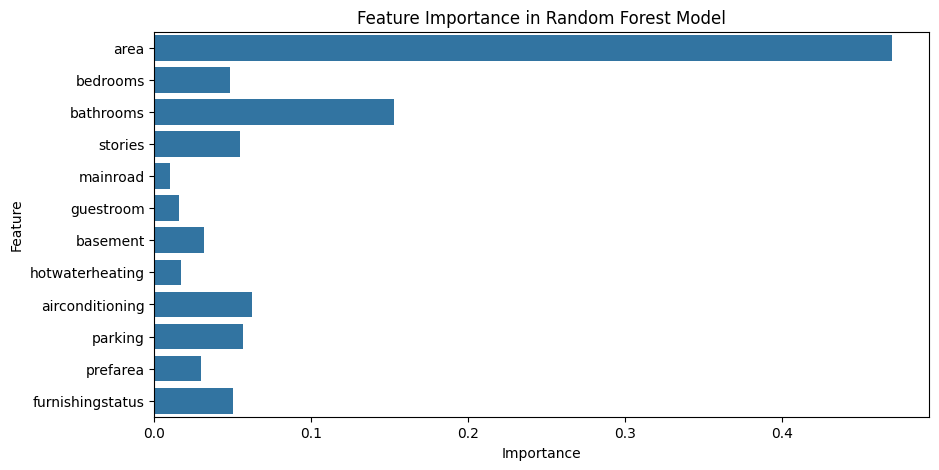

In [12]:
importances = rf_model.feature_importances_
feature_names = X.columns

# Plot feature importance
plt.figure(figsize=(10, 5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance in Random Forest Model")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [18]:
# Ensure test data is available
df_test = X_test.copy()  # Copy test features
df_test["Actual Price"] = y_test.values
df_test["Predicted Price"] = y_pred_rf

# Save to CSV
df_test.to_csv("housing_data_with_predictions.csv", index=False)

print("File saved successfully as 'housing_data_with_predictions.csv'.")


File saved successfully as 'housing_data_with_predictions.csv'.
